### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Import the dataset

In [4]:
dataset = pd.read_csv("StudentsPerformance.csv")

dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Visualizing Score Distributions and Basic Correlations

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


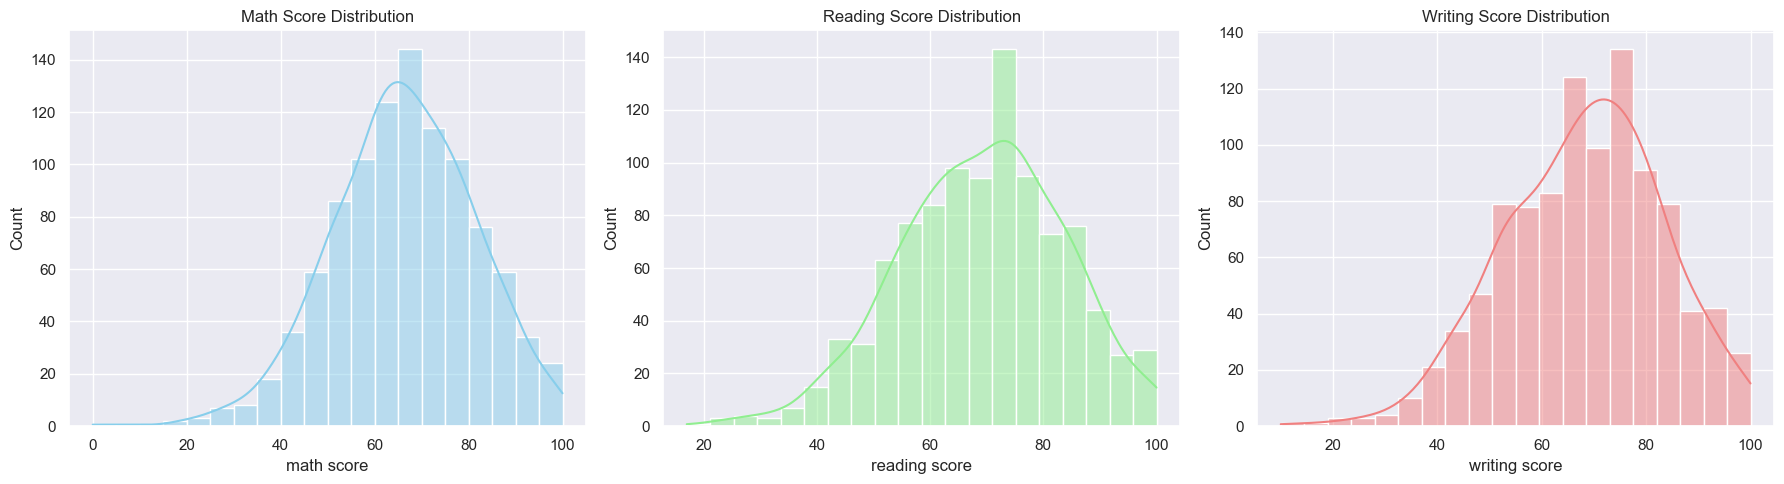

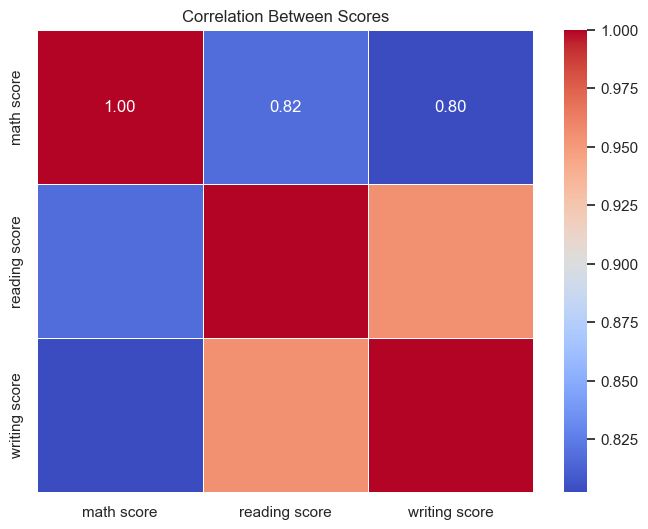

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [6]:
# Plot distribution of scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(dataset['math score'], bins=20, kde=True, ax=axes[0], color="skyblue").set(title='Math Score Distribution')
sns.histplot(dataset['reading score'], bins=20, kde=True, ax=axes[1], color="lightgreen").set(title='Reading Score Distribution')
sns.histplot(dataset['writing score'], bins=20, kde=True, ax=axes[2], color="lightcoral").set(title='Writing Score Distribution')
plt.tight_layout()

# Check correlations between scores
correlation = dataset[['math score', 'reading score', 'writing score']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Scores')
plt.show()

correlation

#### Key Observations

1. **Score Distributions**

    1. Math, reading, and writing scores are roughly normally distributed, with no extreme outliers.

2. **Strong Correlations**
     
     1. Math and reading scores are highly correlated (0.82).
     2. Reading and writing scores have the strongest correlation (0.95).

This suggests a potential to predict one score based on others using regression models.

### Visualizing Average Scores based on Categorical Variables

In [9]:
# Calculate average scores grouped by categorical variables
gender_scores = dataset.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
lunch_scores = dataset.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
prep_course_scores = dataset.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
parent_edu_scores = dataset.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

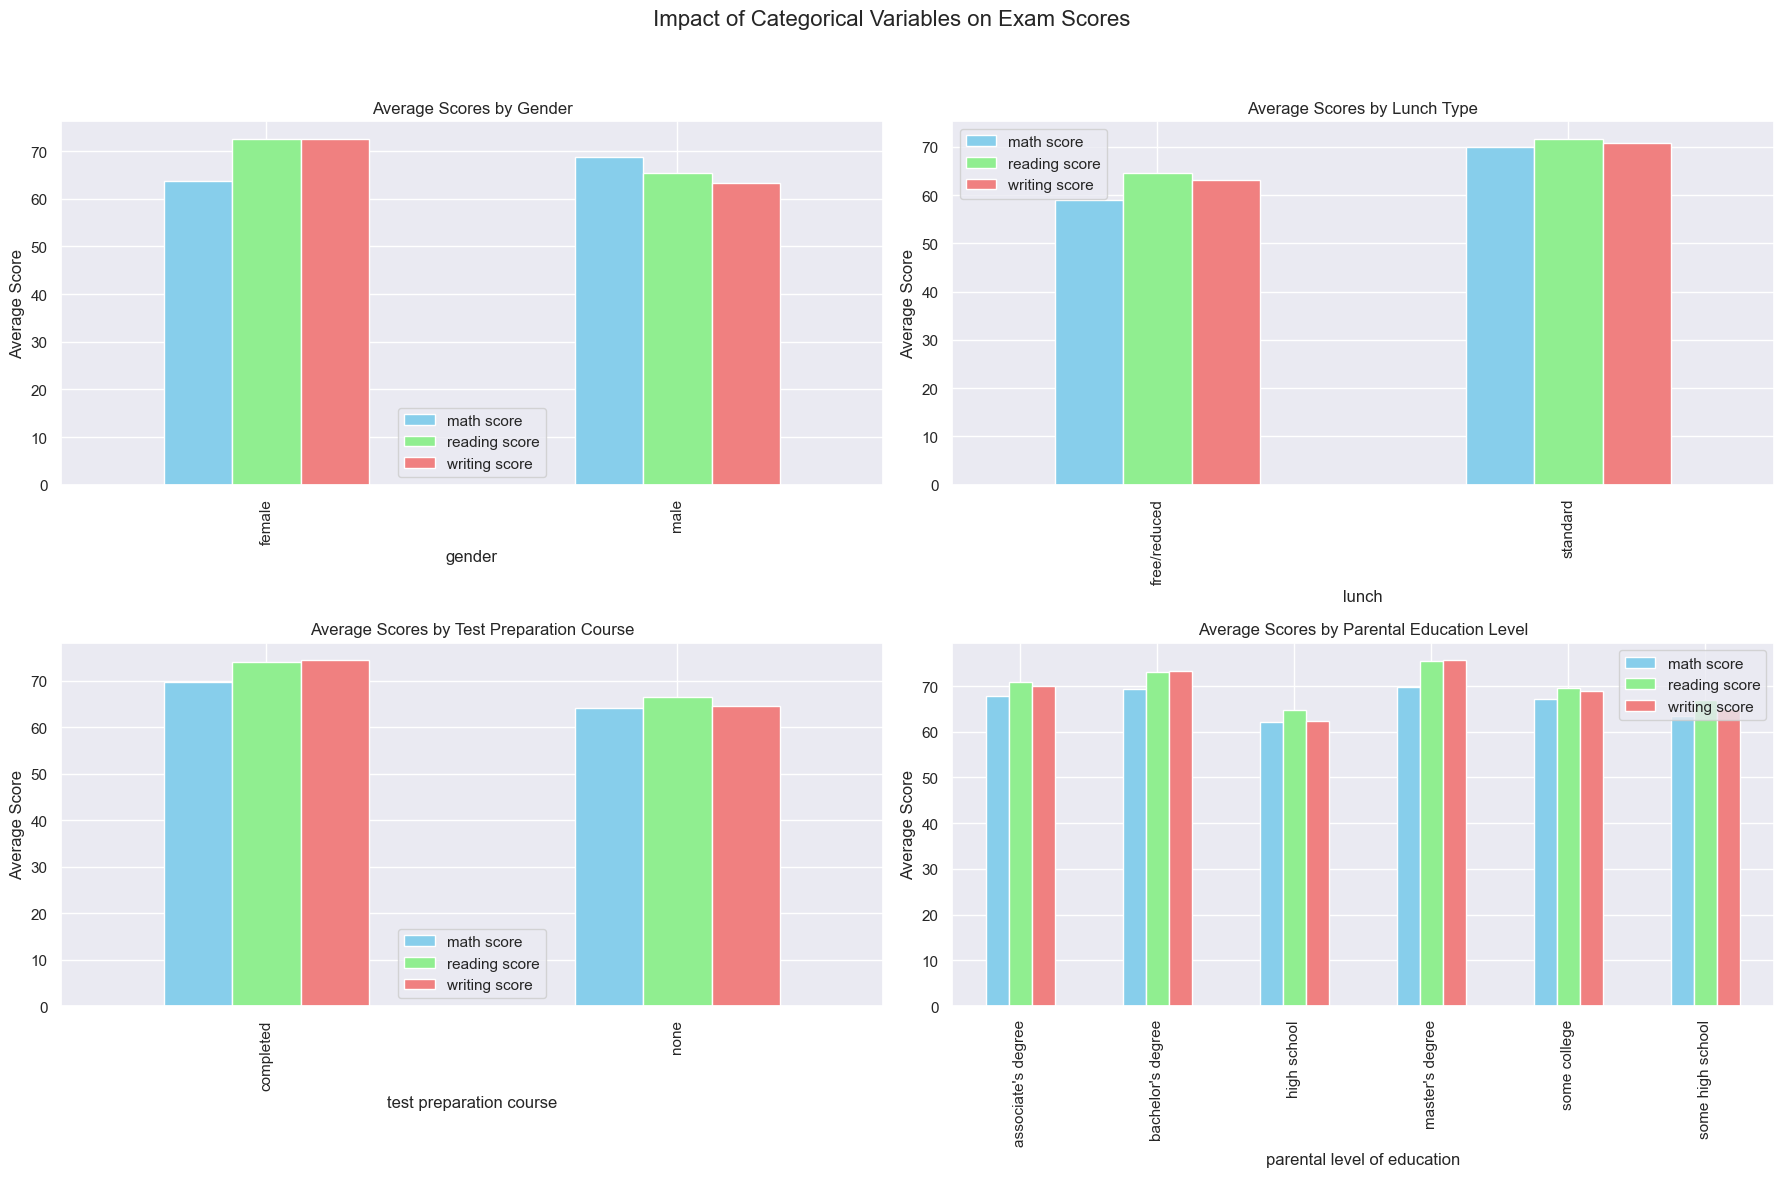

In [10]:
# Visualize impact of gender
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Impact of Categorical Variables on Exam Scores", fontsize=16)

# Gender
gender_scores.plot(kind='bar', ax=axes[0, 0], color=["skyblue", "lightgreen", "lightcoral"])
axes[0, 0].set_title("Average Scores by Gender")
axes[0, 0].set_ylabel("Average Score")

# Lunch
lunch_scores.plot(kind='bar', ax=axes[0, 1], color=["skyblue", "lightgreen", "lightcoral"])
axes[0, 1].set_title("Average Scores by Lunch Type")
axes[0, 1].set_ylabel("Average Score")

# Test Preparation Course
prep_course_scores.plot(kind='bar', ax=axes[1, 0], color=["skyblue", "lightgreen", "lightcoral"])
axes[1, 0].set_title("Average Scores by Test Preparation Course")
axes[1, 0].set_ylabel("Average Score")

# Parental Education Level
parent_edu_scores.plot(kind='bar', ax=axes[1, 1], color=["skyblue", "lightgreen", "lightcoral"])
axes[1, 1].set_title("Average Scores by Parental Education Level")
axes[1, 1].set_ylabel("Average Score")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Categorical Variables' Impact

**Gender**

1. Males score higher in math (68.7 vs 63.6).
2. Females outperform in reading (72.6 vs 65.5) and writing (72.5 vs 63.3).

This highlights a gender-based performance gap in specific subjects.

**Lunch Type**

1. Students with standard lunch perform better across all subjects:
    1. Math: 70.0 vs 58.9
    2. Reading: 71.7 vs 64.7
    3. Writing: 70.8 vs 63.0

Lunch type could be linked to socio-economic status and access to better nutrition.

**Test Preparation Course**

1. Students who completed the test prep course scored significantly higher:
    1. Math: 69.7 vs 64.1
    2. Reading: 73.9 vs 66.5
    3. Writing: 74.4 vs 64.5

Test preparation has a noticeable positive impact on performance.

**Parental Education**

1. Higher parental education correlates with better student performance.
    1. Master's degree: Highest average scores across all subjects.
    2. High school: Lowest scores on average.

### Defining the target variables and features

In [13]:
x = dataset.drop(columns=['math score', 'reading score', 'writing score'])  # Features
y = dataset['math score']

### Encoding Categorical data

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["gender" , "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)  
], remainder='passthrough')

dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Splitting dataset to train set and test set

In [17]:
from sklearn.model_selection import train_test_split


x_encoded = preprocessor.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=0)

### Training the Linear Regression model on the training set

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the result

In [21]:
y_pred = regressor.predict(x_test)

### Evaluating the model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(168.75407474761943, 0.2552829514548025)

### Comparing the Original and Predicted Scores

In [25]:
y_pred = [f"{val:.0f}" for val in y_pred]
comparison_df = pd.DataFrame({
    "Original Score": y_test,
    "Predicted Score": y_pred
})

comparison_df = comparison_df.sort_index()

comparison_df

,Original Score,Predicted Score
1,69,71
5,71,65
8,64,63
14,50,66
27,67,68
...,...,...
989,67,63
990,86,68
993,62,60
996,62,54


### Conclusion

1. **Mean Squared Error (MSE)**
   1. 168.75: This value represents the average squared difference between the predicted and actual math scores. While the magnitude depends on the range of math scores, lower values are better.
    2. Since the scores range between 0–100, an MSE of ~169 suggests the predictions have some room for improvement.

2. **R² Score (Coefficient of Determination)**
    1. 0.255: This means the model explains only about 25.5% of the variance in math scores.
    2. This is relatively low, indicating that the features provided don’t fully explain the math scores.